In [399]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

In [316]:
files = os.listdir('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results')

In [228]:
dfs = []
for f in files:
    df1 = pd.read_csv('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results\\Adygeja_Resp_2022-03-20.csv', encoding = 'utf-8')
    dfs.append(df1)

In [229]:
data = pd.concat(dfs)

In [328]:
results = pd.read_excel(r'C:\\Users\\gosti\\Downloads\\Telegram Desktop\\01_04_D_New_loans_subj.xlsx', sheet_name='итого', header=1)

In [473]:
data = data.drop(columns=data[['customer inn', 'supplier inn', 'protocol date', 'doc']])
data = data.assign(bg=data.amount / data.price)
data = data.drop_duplicates()
data = data[data.bg <= 1]
data

KeyError: "None of [Index(['customer inn', 'supplier inn', 'protocol date', 'doc'], dtype='object')] are in the [columns]"

In [238]:
data['st date'] = data['st date'].astype('datetime64[ns]')
data['end date'] = data['end date'].astype('datetime64[ns]')

C:\Temp\ipykernel_9852\731554311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['st date'] = data['st date'].astype('datetime64[ns]')
C:\Temp\ipykernel_9852\731554311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['end date'] = data['end date'].astype('datetime64[ns]')


In [239]:
date_list = pd.date_range('01.01.2019', '01.05.2023', freq='M')

In [241]:
t = (data.iloc[1])

In [243]:
d = list(map(lambda x: datetime.datetime(2019,6,25)<= x<= datetime.datetime(2021,12,31),date_list))

In [244]:
def check(st, end):
    return list(map(lambda x: st<= x <= end, date_list))

In [245]:
t_arr = np.zeros(len(date_list))

In [247]:
for r in data.iterrows():
    t_arr+=np.array(check(r[1]['st date'], r[1]['end date'])) * r[1]['amount']

In [250]:
df = pd.DataFrame(t_arr)

In [251]:
df

,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,3.351258e+06
4,3.351258e+06
5,3.512462e+06
6,1.527409e+07
7,1.527409e+07
8,1.527409e+07
9,1.591606e+07


<AxesSubplot:>

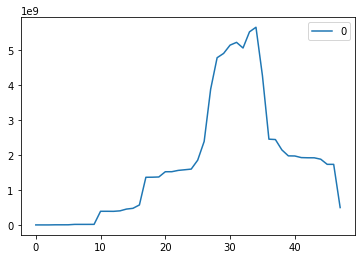

In [252]:
df.plot()

# Задачи
* Подгрузка данных и их форматирование
* Анализ Корреляции двух рядов
* Продумать методы прогнозирования ряда
 + Какие модели можно использовать
 + Что делать с идеей аккумулирующего эффекта
 + Первый драфт


In [437]:
res = pd.DataFrame(results.iloc[0])

In [438]:
res1 = pd.DataFrame(res[-43:])
res1

,0
Январь 2019,3202534
Февраль 2019,3504045
Март 2019,4174296
Апрель 2019,4637280
Май 2019,3345201
Июнь 2019,4124086
Июль 2019,5143083
Август 2019,5062245
Сентябрь 2019,5264321
Октябрь 2019,5693608


In [439]:
res1 = res1.rename_axis('date').reset_index()

In [440]:
res1 = res1.rename(columns={0: "credit"})

In [441]:
res1['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [444]:
res1 = res1.set_index('date')

In [445]:
res1

,credit
date,
2019-01-31,3202534
2019-02-28,3504045
2019-03-31,4174296
2019-04-30,4637280
2019-05-31,3345201
2019-06-30,4124086
2019-07-31,5143083
2019-08-31,5062245
2019-09-30,5264321


In [337]:
df2 = pd.DataFrame(df[:43])

In [450]:
df2 = df2.rename(columns={0: "amount"})
df2 = df2.rename_axis('date').reset_index()
df2['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')


ValueError: cannot insert date, already exists

In [451]:
df2 = df2.set_index('date')

In [452]:
df2

,amount
date,
2019-01-31,0.000000e+00
2019-02-28,0.000000e+00
2019-03-31,0.000000e+00
2019-04-30,3.351258e+06
2019-05-31,3.351258e+06
2019-06-30,3.512462e+06
2019-07-31,1.527409e+07
2019-08-31,1.527409e+07
2019-09-30,1.527409e+07


In [453]:
data1 = pd.concat([df2,res1], axis=1, join='inner')

In [463]:
data1['N'] = list(range(1,44))
data1 = data1.reindex(columns=['N', 'credit', 'amount'])

In [464]:
data1

,N,credit,amount
date,,,
2019-01-31,1,3202534,0.000000e+00
2019-02-28,2,3504045,0.000000e+00
2019-03-31,3,4174296,0.000000e+00
2019-04-30,4,4637280,3.351258e+06
2019-05-31,5,3345201,3.351258e+06
2019-06-30,6,4124086,3.512462e+06
2019-07-31,7,5143083,1.527409e+07
2019-08-31,8,5062245,1.527409e+07
2019-09-30,9,5264321,1.527409e+07


In [460]:
r1 = np.corrcoef(data1.N,data1.amount)

In [461]:
r1

array([[1.        , 0.73510921],
       [0.73510921, 1.        ]])

In [267]:
r2 = np.corrcoef(data1.credit.astype(int),data1.amount)

In [268]:
r2

array([[1.       , 0.6568592],
       [0.6568592, 1.       ]])

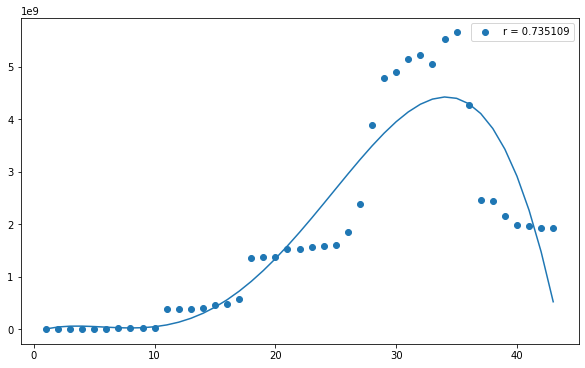

In [269]:
x = data1.N
y = data1.amount
z = np.polyfit (x, y, 4 )
p = np.poly1d (z)

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot (x, p(x))
plt.legend(['r = 0.735109'])
plt.show()

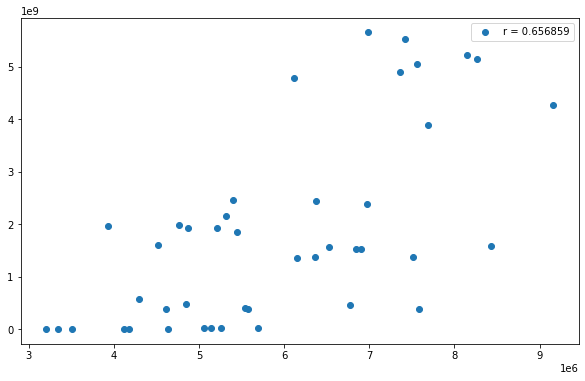

In [270]:
x2 = data1.credit.astype(int)
y2 = data1.amount
plt.figure(figsize=(10,6))
plt.scatter(x2,y2)
plt.legend(['r = 0.656859'])
plt.show()

In [271]:
import scipy.stats

In [272]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [273]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

<Figure size 720x432 with 0 Axes>

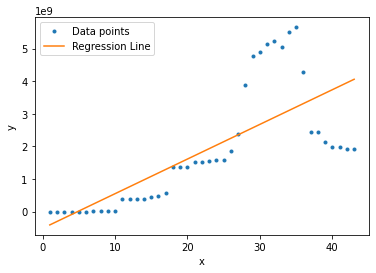

In [289]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='.', label='Data points')
ax.plot(x, intercept + slope * x, label="Regression Line")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

In [294]:
data1.amount.describe()

count    4.300000e+01
mean     1.825868e+09
std      1.815982e+09
min      0.000000e+00
25%      3.889231e+08
50%      1.521780e+09
75%      2.414825e+09
max      5.653194e+09
Name: amount, dtype: float64

In [296]:
data1.credit.astype(int).describe()

count    4.300000e+01
mean     5.898794e+06
std      1.491342e+06
min      3.202534e+06
25%      4.809356e+06
50%      5.575864e+06
75%      6.978528e+06
max      9.160939e+06
Name: credit, dtype: float64

## Прогнозирование
sklearn:
* OLS и GLS - разница
* Регуляризация L1, L2

Этапы жизни модели:
* EDA
* preprocessing (Standartscaler, RFE and feature selection)
* data to : train, test, predict
    + fit
    + predict on test ( Metrics: r2,MAPE,MAE)
    + predict on predict with fitting on train+test


y = x0 + a1x1 + b(x2)^ + a2*t

### Что посмотреть:
* Борьба с сезнонностью (Ряд Фурье, STL разложение)
* Модели Экспоненциального сглаживания  (ETS Хольт-Уинтерс)
* ACF
* stl = STL(*params)
* res = stl.fit(y)

In [465]:
stl = STL(res1, period=12).fit()

In [343]:
from pylab import rcParams

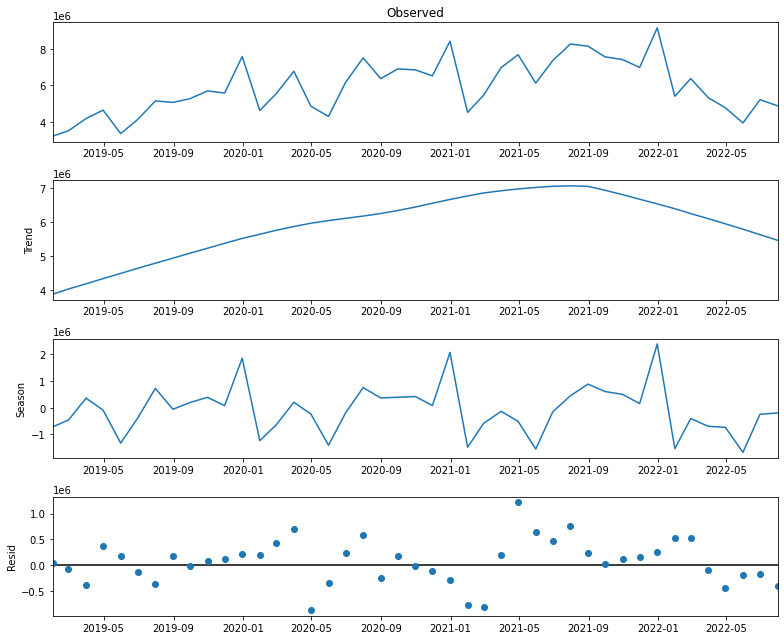

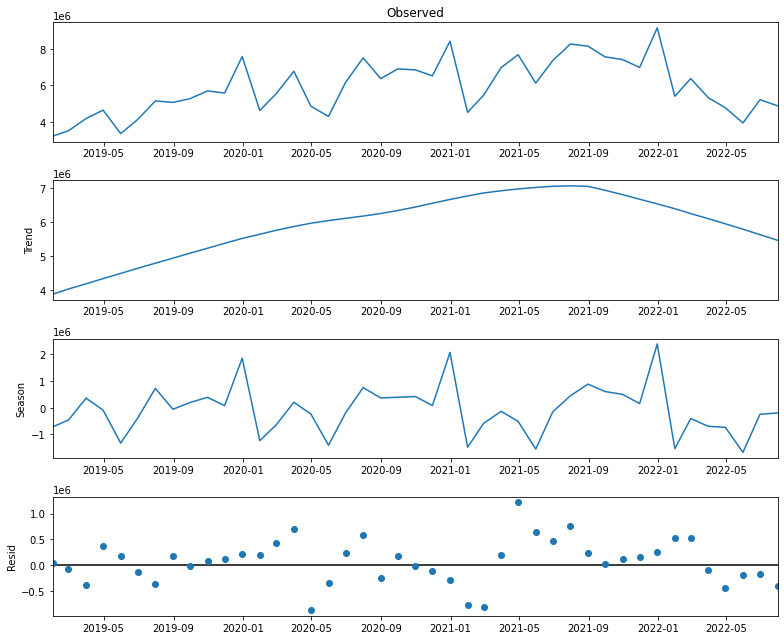

In [467]:
rcParams['figure.figsize'] = 11,9
stl.plot()


AxesSubplot(0.125,0.125;0.775x0.755)


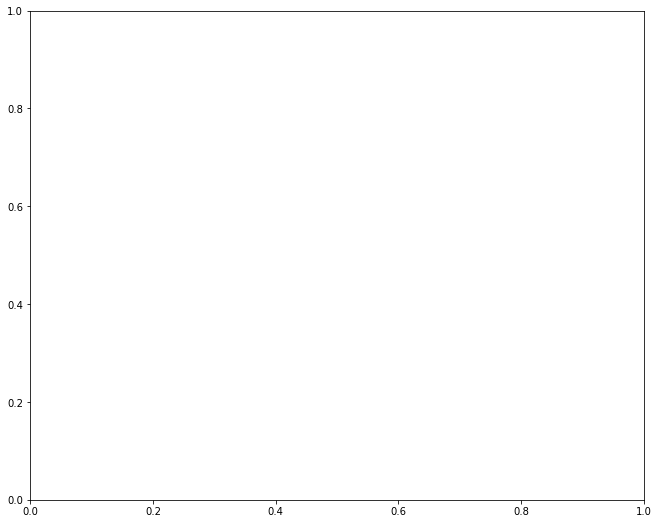

In [477]:
plt.figure().gca()
print (ax)

In [345]:
from statsmodels.tsa.stattools import adfuller

In [476]:
adf_test = adfuller(stl)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

TypeError: float() argument must be a string or a number, not 'DecomposeResult'

In [305]:
from statsmodels.graphics.tsaplots import plot_acf

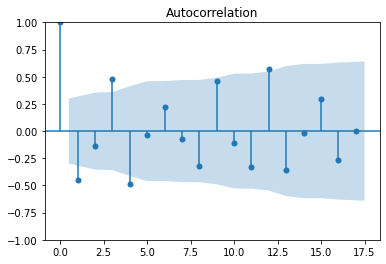

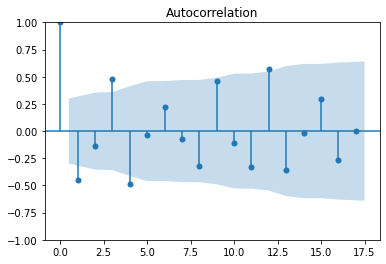

In [313]:
plot_acf(stl.resid)

### Что сделать:
* Построить регрессию от времени
* Построить регрессию от времени + кредиты
* Построить регрессию от кредитов
* Сравнить между собой по r^2,MAE,MAPE
* Экспоненциальное сглаживание


In [474]:
from stldecompose import decompose, forecast

ModuleNotFoundError: No module named 'stldecompose'

In [352]:
from sklearn.linear_model import LinearRegression

In [469]:
train = pd.DataFrame(res1[:28])
test = pd.DataFrame(res1[28:])

In [470]:
model = LinearRegression()

In [472]:
model.fit(train)

TypeError: fit() missing 1 required positional argument: 'y'